# Description

* Author: Seydou DIA & Simona MILADINOVA
* Creation date: 04-02-2022
* Last update : 04-02-2022<br>

First Notebook of processing and pre-analysis of stock data 

# Setup

In [1]:
%matplotlib notebook


## Imports

In [2]:
# os related
from pathlib import Path
import os 

# data related
import pandas as pd
import missingno as msno
import datetime as dt


# visual related
import matplotlib.pyplot as plt
# time related

## Paths

In [3]:
PROJECT_PATH = Path(os.getcwd()).parent

In [5]:
RAW_DATA = PROJECT_PATH / "RAW_DATA" 

CSV_FILE = RAW_DATA / "Individual_stock_data_csv.csv"
XLSX_FILE = RAW_DATA / "Individual_stock_data.xlsx"

## Utils

In [15]:
def proc_df(raw_df, index="timestamp"):
    
    
    raw_df.rename(columns={"Unnamed: 0": index}, inplace=True)
    
    raw_cols = raw_df.columns
    raw_df.columns =  [x.lower() for x in raw_cols]
    return raw_df
    

# Notebook

## Stock data

In [5]:

df = pd.read_csv(CSV_FILE, sep=";")


In [6]:
df

,Unnamed: 0,AAPL,MSFT,AMZN,FB,JPM,GOOGL,JNJ,WMT,V,...,PWR,TRIP,UNM,BRK/B,GOOG,DISCK,FOX,NWS,UA,VIAB
0,05/12/1989,"320,44","619,64",NaN,NaN,477,NaN,"382,85","9096,68",NaN,...,NaN,NaN,"180,07",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/12/1989,"256,35","589,29",NaN,NaN,"488,96",NaN,"386,18","9096,68",NaN,...,NaN,NaN,"180,07",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19/12/1989,"249,23","574,11",NaN,NaN,"439,49",NaN,"373,7","8839,71",NaN,...,NaN,NaN,"172,06",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26/12/1989,"252,79","610,71",NaN,NaN,"450,91",NaN,"379,52","8916,8",NaN,...,NaN,NaN,"176,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02/01/1990,"265,25","633,93",NaN,NaN,"456,61",NaN,"398,67","9687,71",NaN,...,NaN,NaN,"180,07",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,12/11/2019,"64259,93","233797,6","90791,38","508,66","14527,8","2583,25","13782,2","297373,4","1379,37",...,"571,17","115,48","803,75","952,11","233,21",356,"87,4","91,57","37,81","209,88"
1563,19/11/2019,"65322,11","239075,4","89504,06","521,35","14687,52","2613,88","14146,3","299295,7","1404,96",...,"562,46","116,26","780,03","944,09","236,2","365,31","91,59","91,3","37,88","219,14"
1564,26/11/2019,"64831,5","242506,3","91758,56","520,43","14810,12","2614,7","14492,55","297548,3","1403,27",...,"558,04","119,25","803,22","943,53","235,85","387,25","90,97","91,64","39,97",225
1565,03/12/2019,"63644,21","238167,6","90380,81","520,04","14597,53","2578,33","14491,49","296250,1","1398,27",...,"544,25","114,34","771,24",940,"232,57","374,69","88,8","88,82","40,36","218,39"


In [7]:
df.rename(columns={"Unnamed: 0": "timestamp"}, inplace=True)

In [8]:
df["timestamp"] = df["timestamp"].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [9]:
df.set_index("timestamp", inplace=True)

In [10]:
df

,AAPL,MSFT,AMZN,FB,JPM,GOOGL,JNJ,WMT,V,BAC,...,PWR,TRIP,UNM,BRK/B,GOOG,DISCK,FOX,NWS,UA,VIAB
timestamp,,,,,,,,,,,,,,,,,,,,,
1989-12-05,"320,44","619,64",NaN,NaN,477,NaN,"382,85","9096,68",NaN,"512,75",...,NaN,NaN,"180,07",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-12-12,"256,35","589,29",NaN,NaN,"488,96",NaN,"386,18","9096,68",NaN,"502,75",...,NaN,NaN,"180,07",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-12-19,"249,23","574,11",NaN,NaN,"439,49",NaN,"373,7","8839,71",NaN,"475,61",...,NaN,NaN,"172,06",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989-12-26,"252,79","610,71",NaN,NaN,"450,91",NaN,"379,52","8916,8",NaN,"519,89",...,NaN,NaN,"176,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,"265,25","633,93",NaN,NaN,"456,61",NaN,"398,67","9687,71",NaN,"532,74",...,NaN,NaN,"180,07",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-12,"64259,93","233797,6","90791,38","508,66","14527,8","2583,25","13782,2","297373,4","1379,37","3493,6",...,"571,17","115,48","803,75","952,11","233,21",356,"87,4","91,57","37,81","209,88"
2019-11-19,"65322,11","239075,4","89504,06","521,35","14687,52","2613,88","14146,3","299295,7","1404,96","3477,76",...,"562,46","116,26","780,03","944,09","236,2","365,31","91,59","91,3","37,88","219,14"
2019-11-26,"64831,5","242506,3","91758,56","520,43","14810,12","2614,7","14492,55","297548,3","1403,27","3521,05",...,"558,04","119,25","803,22","943,53","235,85","387,25","90,97","91,64","39,97",225


<IPython.core.display.Javascript object>


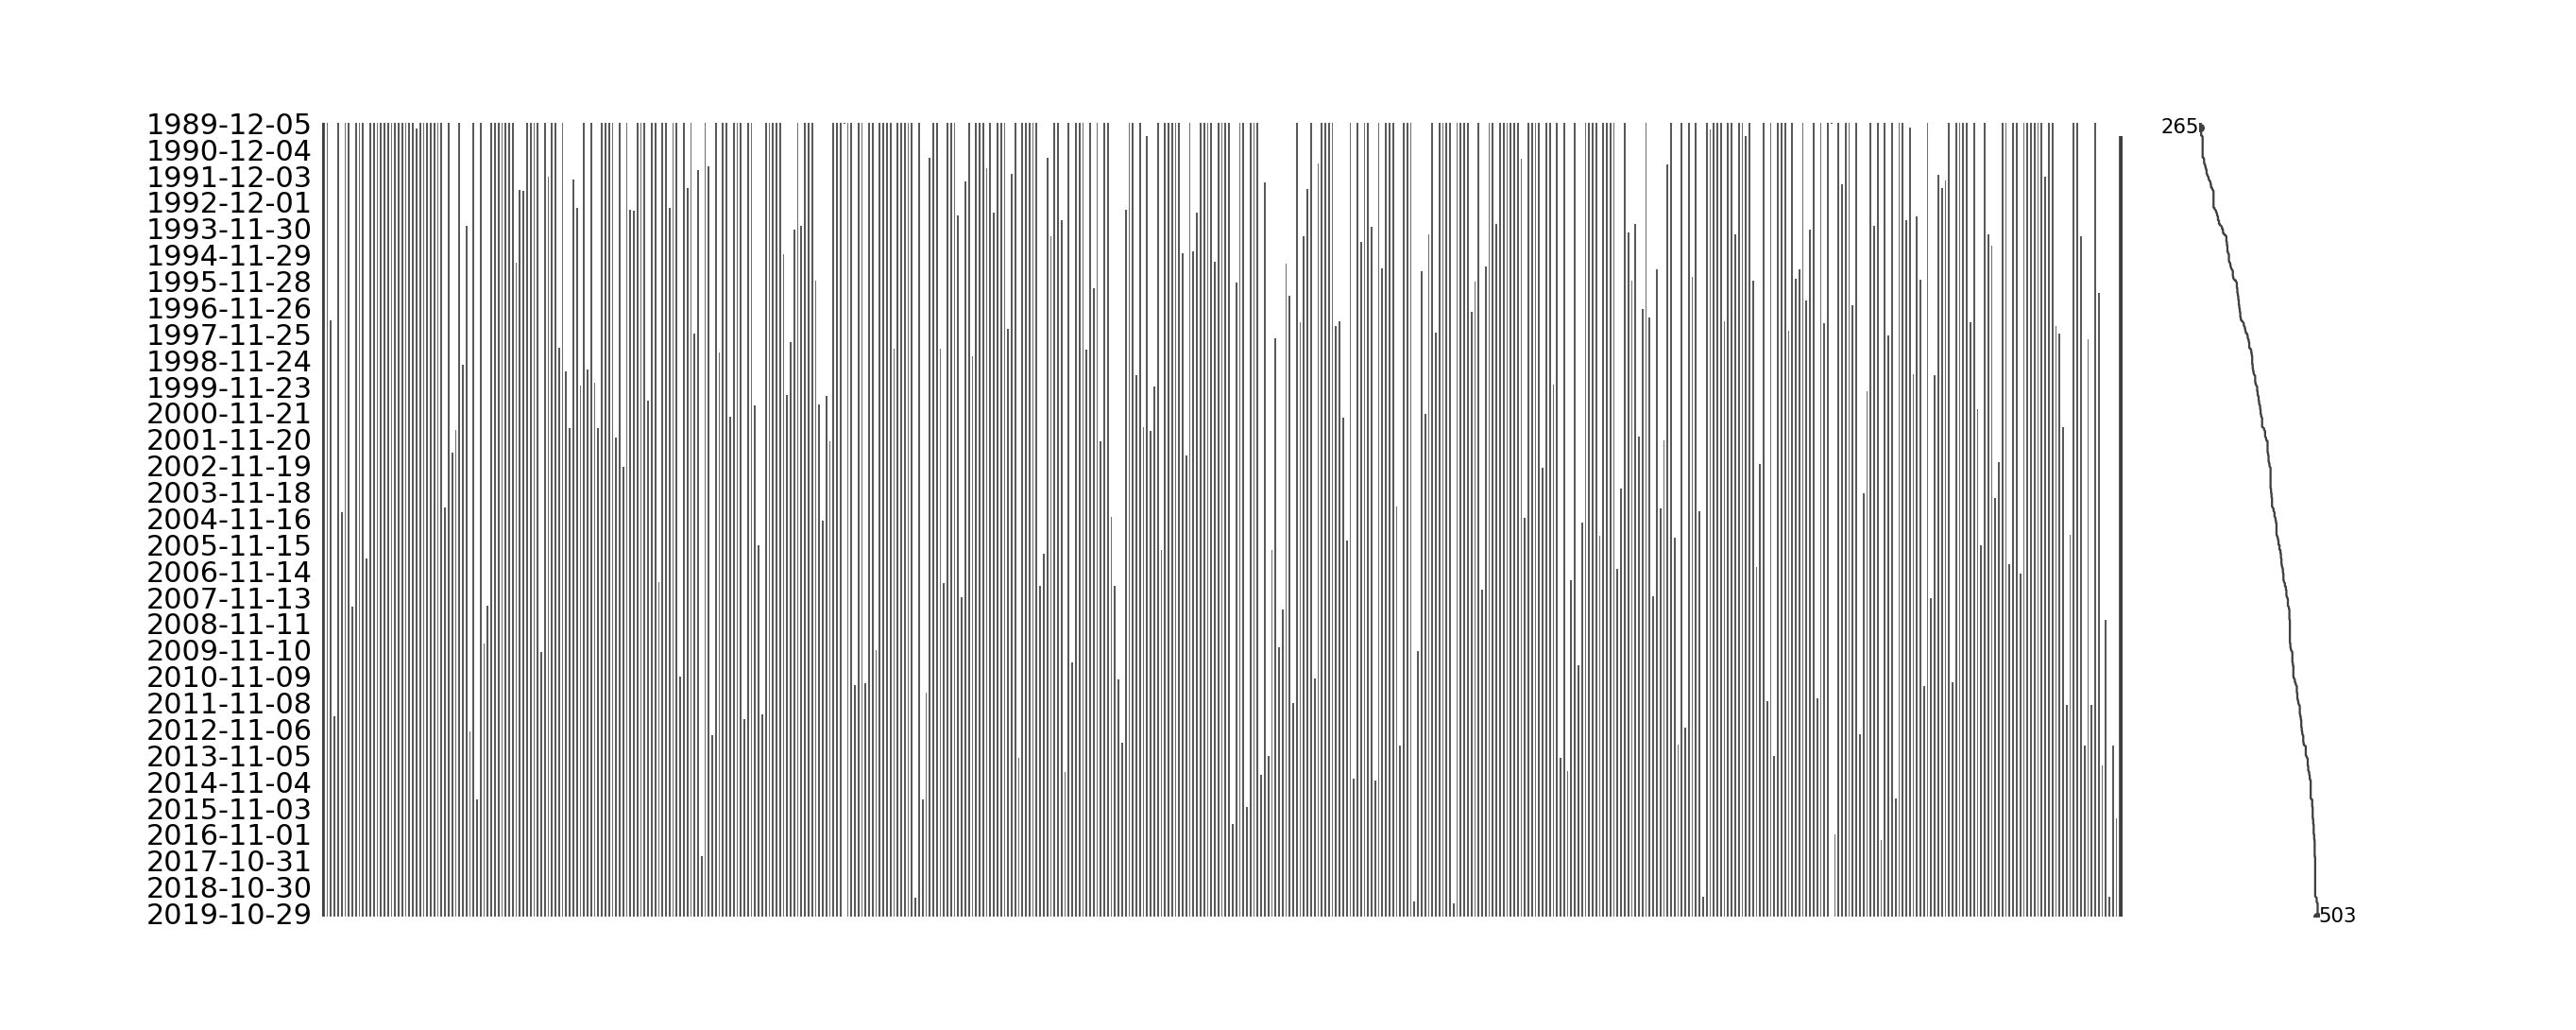

<AxesSubplot:>

In [21]:
msno.matrix(df, freq="364D")



* Seulement 265 titres avec des valeurs entre 1989 et 2019
* On propose de fixer un seuil de semaine manquante


In [29]:
len(df.index)

1567

In [111]:

seuil_mois = 20 
seuil_an = 11

# Retrieve number of Nan in each column
null_series = df.isnull().sum().sort_values(ascending=False)

# Set threshold at which we will use the data
use_col = null_series[null_series < seuil_an*52].index

In [113]:

missing_week = [len(null_series[null_series <= seuil]) for seuil in range(len(df))] 


In [154]:
start_date = dt.datetime(2005,1,1)


<IPython.core.display.Javascript object>


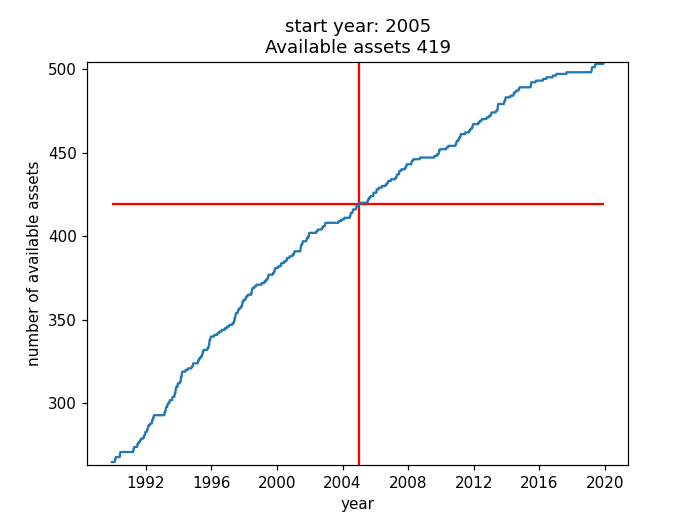

Text(0.5, 1.0, 'start year: 2005\nAvailable assets 419')

In [155]:
plt.figure()
plt.plot(df.index, missing_week)
plt.xlabel("year")
plt.ylabel("number of available assets")
plt.vlines(x=start_date, ymin=263,ymax=600, color="red")
plt.ylim(263,504)

threshold = df_info.loc[str(start_date.year)].values[0][0]

plt.hlines(threshold, xmin=df.index[0], xmax=df.index[-1], color="red")

plt.title(f"start year: {start_date.year}\nAvailable assets {threshold}")

In [89]:
df_info = pd.DataFrame(index=df.index, data=missing_week, columns=["available_assets"])

In [92]:
df_info["2000"]

,available_assets
timestamp,
1989-12-05,265
1989-12-12,265
1989-12-19,265
1989-12-26,265
1990-01-02,265
...,...
2019-11-12,503
2019-11-19,503
2019-11-26,503


## Footprint data

In [18]:
df_carbon = pd.read_excel(XLSX_FILE, sheet_name="carbon footprint data")

In [22]:
df_carbon = proc_df(df_carbon, index="company")

In [23]:
df_carbon

,timestamp,name,sector,sector_name,scope1,scope2,emissions,market_value,revenues,carbon_footprint,intensity
0,AAPL,APPLE,45,IT,45.397000,776.500000,821.897000,1206167.00,260174.000,0.681412,3.159028
1,MSFT,MICROSOFT,45,IT,97.639000,2692.709000,2790.348000,1169037.00,125843.000,2.386877,22.173248
2,AMZN,AMAZON.COM,25,Consumer Discretionary,4980.000000,4710.000000,9690.000000,872766.50,232887.000,11.102626,41.608162
3,FB,FACEBOOK CLASS A,50,Communication Services,18.900000,1137.000000,1155.900000,473472.70,55838.000,2.441323,20.700956
4,JPM,JP MORGAN CHASE & CO.,40,Financial,78.229000,770.704000,848.933000,432897.40,131412.000,1.961049,6.460087
...,...,...,...,...,...,...,...,...,...,...,...
500,DISCK,DISCOVERY SERIES C,50,Communication Services,NaN,NaN,NaN,10855.98,10553.000,NaN,NaN
501,FOX,FOX B,50,Communication Services,60.395000,120.093000,180.488000,9571.59,11389.000,18.856637,15.847572
502,NWS,NEWS 'B',50,Communication Services,28.356311,173.658313,202.014624,2800.81,10074.000,72.127215,20.053070
503,UA,UNDER ARMOUR 'C',25,Consumer Discretionary,NaN,NaN,NaN,4008.28,5193.185,NaN,NaN


In [ ]:
For each row selected initially, we should